# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
from plotnine import *

penguins = load_penguins()
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

### Preprocessing for KNN

In [24]:
#training/test data set up

X = penguins.drop(["species"], axis = 1)
y = penguins["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
#CT and preprocessing

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [26]:
#first knn pipeline
knn_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=5))]
)

In [27]:
#Fitting and predictions
knn_pipeline_fitted_1 = knn_pipeline_1.fit(X_train, y_train)
y_preds_1 = knn_pipeline_fitted_1.predict(X_test)

In [28]:
#second knn pipeline
knn_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("knn", KNeighborsClassifier(n_neighbors=15))]
)

In [29]:
#Fitting and predictions
knn_pipeline_fitted_2 = knn_pipeline_2.fit(X_train, y_train)
y_preds_2 = knn_pipeline_fitted_2.predict(X_test)

### KNN Confusion Matrix

In [30]:
#Confusion matrices
knn_con_matrix_1 = confusion_matrix(y_test, y_preds_1)
knn_con_matrix_2 = confusion_matrix(y_test, y_preds_2)

In [31]:
print(knn_con_matrix_1, "\n", "\n", knn_con_matrix_2)

[[31  0  0]
 [ 0 19  0]
 [ 0  0 34]] 
 
 [[31  0  0]
 [ 0 19  0]
 [ 0  0 34]]


### KNN Accuracy score

In [32]:
knn_accuracy_1 = accuracy_score(y_test, y_preds_1)
knn_accuracy_2 = accuracy_score(y_test, y_preds_2)

In [33]:
print(round(knn_accuracy_1, 4), "\n", "\n", round(knn_accuracy_2, 4))

#Not sure why I am getting exactly 1, should not be this value i don't think

1.0 
 
 1.0


### Precision Score KNN

In [35]:
knn_precision_score_1 = precision_score(y_test, y_preds_1, average = None)
knn_precision_score_2 = precision_score(y_test, y_preds_2, average = None)

print(knn_precision_score_1, "\n", "\n", knn_precision_score_2) #Same goes for this

[1. 1. 1.] 
 
 [1. 1. 1.]


### Recall scores KNN

In [36]:
#Recall score KNN
knn_recall_score_1 = recall_score(y_test, y_preds_1, average = None)
knn_recall_score_2 = recall_score(y_test, y_preds_2, average = None)

print(knn_recall_score_1, "\n", "\n", knn_recall_score_2)

[1. 1. 1.] 
 
 [1. 1. 1.]


### F1 Scores KNN

In [38]:
#F1 Score knn_1

report_knn_1 = classification_report(y_test, y_preds_1)
report_knn_1

'              precision    recall  f1-score   support\n\n      Adelie       1.00      1.00      1.00        31\n   Chinstrap       1.00      1.00      1.00        19\n      Gentoo       1.00      1.00      1.00        34\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

In [39]:
#F1 Score knn_2

report_knn_2 = classification_report(y_test, y_preds_2)
report_knn_2

'              precision    recall  f1-score   support\n\n      Adelie       1.00      1.00      1.00        31\n   Chinstrap       1.00      1.00      1.00        19\n      Gentoo       1.00      1.00      1.00        34\n\n    accuracy                           1.00        84\n   macro avg       1.00      1.00      1.00        84\nweighted avg       1.00      1.00      1.00        84\n'

### ROC/AUC KNN

In [41]:
#ROC/AUC 1

prob_knn_1 = knn_pipeline_fitted_1.predict_proba(X_test)
roc_auc_knn_1 = roc_auc_score(y_test, prob_knn_1, multi_class='ovr')
roc_auc_knn_1

1.0

In [42]:
#ROC/AUC 2
prob_knn_2 = knn_pipeline_fitted_2.predict_proba(X_test)
roc_auc_knn_2 = roc_auc_score(y_test, prob_knn_2, multi_class='ovr')
roc_auc_knn_2

1.0

## Decision Tree Models

In [43]:
decision_tree_pipeline_1 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree_regression", DecisionTreeClassifier(min_samples_leaf = 4))]
)

decision_tree_pipeline_fitted_1 = decision_tree_pipeline_1.fit(X_train, y_train)
y_preds_3 = decision_tree_pipeline_fitted_1.predict(X_test)

In [44]:
decision_tree_pipeline_2 = Pipeline(
  [("preprocessing", ct),
  ("decision_tree_regression", DecisionTreeClassifier(min_samples_leaf = 8))]
)

decision_tree_pipeline_fitted_2 = decision_tree_pipeline_2.fit(X_train, y_train)
y_preds_4 = decision_tree_pipeline_fitted_2.predict(X_test)

### Confusion Matrix DT

In [45]:
decision_tree_confusion_matrix_1 = confusion_matrix(y_test, y_preds_3)
decision_tree_confusion_matrix_2 = confusion_matrix(y_test, y_preds_4)

print(decision_tree_confusion_matrix_1, "\n", "\n", "\n", decision_tree_confusion_matrix_2)

[[30  1  0]
 [ 2 17  0]
 [ 1  0 33]] 
 
 
 [[29  2  0]
 [ 0 17  2]
 [ 0  1 33]]


### Accuracy Score DT

In [46]:
decision_tree_accuracy_score_1 = accuracy_score(y_test, y_preds_3)
decision_tree_accuracy_score_2 = accuracy_score(y_test, y_preds_4)

print(decision_tree_accuracy_score_1, "\n", "\n", decision_tree_accuracy_score_2)

0.9523809523809523 
 
 0.9404761904761905


### Precision Score DT

In [47]:
decision_tree_precision_score_1 = precision_score(y_test, y_preds_3, average = None)
decision_tree_precision_score_2 = precision_score(y_test, y_preds_4, average = None)

print(decision_tree_precision_score_1, "\n", "\n", "\n", decision_tree_precision_score_2)

[0.90909091 0.94444444 1.        ] 
 
 
 [1.         0.85       0.94285714]


### Recall DT

In [48]:
decision_tree_recall_score_1 = recall_score(y_test, y_preds_3, average = None)
decision_tree_recall_score_2 = recall_score(y_test, y_preds_4, average = None)

print(decision_tree_recall_score_1, "\n", "\n", decision_tree_recall_score_2)

[0.96774194 0.89473684 0.97058824] 
 
 [0.93548387 0.89473684 0.97058824]


### F1 Score DT

In [49]:
report_decision_tree_1 = classification_report(y_test, y_preds_3)
report_decision_tree_1

'              precision    recall  f1-score   support\n\n      Adelie       0.91      0.97      0.94        31\n   Chinstrap       0.94      0.89      0.92        19\n      Gentoo       1.00      0.97      0.99        34\n\n    accuracy                           0.95        84\n   macro avg       0.95      0.94      0.95        84\nweighted avg       0.95      0.95      0.95        84\n'

In [50]:
report_decision_tree_2 = classification_report(y_test, y_preds_4)
report_decision_tree_2

'              precision    recall  f1-score   support\n\n      Adelie       1.00      0.94      0.97        31\n   Chinstrap       0.85      0.89      0.87        19\n      Gentoo       0.94      0.97      0.96        34\n\n    accuracy                           0.94        84\n   macro avg       0.93      0.93      0.93        84\nweighted avg       0.94      0.94      0.94        84\n'

### ROC/AUC Decision Tree

In [51]:
prob_decision_tree_1 = decision_tree_pipeline_fitted_1.predict_proba(X_test)
roc_auc_decision_tree_1 = roc_auc_score(y_test, prob_decision_tree_1, multi_class='ovr')
roc_auc_decision_tree_1

0.9980099114982163

In [52]:
prob_decision_tree_2 = decision_tree_pipeline_fitted_2.predict_proba(X_test)
roc_auc_decision_tree_2 = roc_auc_score(y_test, prob_decision_tree_2, multi_class='ovr')
roc_auc_decision_tree_2

0.9880010538791105

## KNN ROC Curve

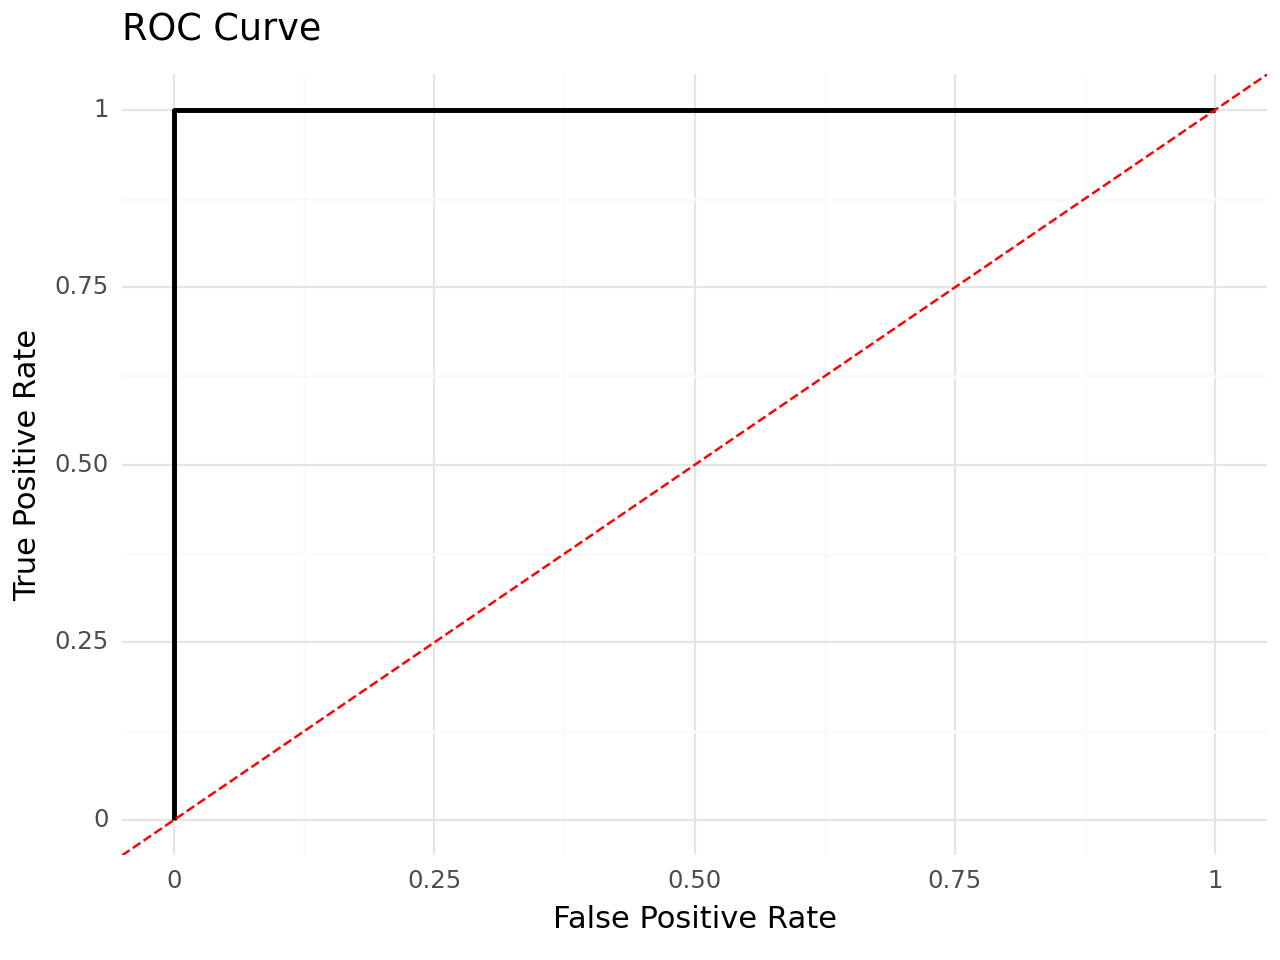

In [54]:
# Convert species labels to numerical
y_bin = label_binarize(y_test, classes=knn_pipeline_fitted_1.classes_)

# Predicted probabilities for each class
y_probs_1 = knn_pipeline_fitted_1.predict_proba(X_test)

# Calculate the ROC curve for each class
fpr, tpr, _ = roc_curve(y_bin.ravel(), y_probs_1.ravel())

# Create a DataFrame for the ROC curve
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Plot the ROC curve using plotnine
roc_plot = (
    ggplot(roc_df, aes(x='FPR', y='TPR')) +
    geom_line(size=1) +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='red') +
    labs(title='ROC Curve', x='False Positive Rate', y='True Positive Rate') +
    theme_minimal()
)

print(roc_plot)